# PySR

In [4]:
import pandas as pd

df = pd.read_csv(f"data/6000_points.csv")
if 'system:index' in df.columns:
    df.drop('system:index', axis=1, inplace=True)
    
if '.geo' in df.columns:
    df.drop('.geo', axis=1, inplace=True)
df['NDVI'] = (df['B8']-df['B4'])/(df['B8']+df['B4'])
df.to_csv('data/ndvi.csv')

In [6]:
df.head()

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,QA60,date,lat,lon,NDVI
0,1380,3202,2266,1245,1101,1240,1413,1716,1944,1959,2250,0,2023-03-23,37.335014,-95.326731,0.224758
1,1317,49,42,889,503,288,247,208,190,141,146,0,2023-06-04,-21.011541,-124.765524,-0.342657
2,1162,2031,1475,951,850,968,1036,1136,1265,1185,1298,0,2023-01-26,11.062935,-11.792313,0.100790
3,1286,1291,444,980,823,532,832,1995,2736,2485,3134,0,2023-10-24,-1.910390,114.546423,0.647332
4,1381,2050,1363,1126,1016,975,1155,1617,1845,1806,2015,0,2023-04-13,27.868199,120.743335,0.298813


In [7]:
x = df.drop(['NDVI', 'date'], axis=1)
y = df['NDVI']

In [8]:
from pysr import *

model = PySRRegressor(
    binary_operators=["+", "-", "*", "/"],
    unary_operators=["exp"],
    select_k_features=5,
)

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [9]:
model.fit(x, y)

/home/echikhao/Bureau/reg_symbolique/.venv/lib/python3.12/site-packages/pysr/sr.py:2811: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Using features ['B11' 'B2' 'B4' 'B8' 'B8A']
Compiling Julia backend...
[ Info: Started!



Expressions evaluated per second: 1.420e+05
Progress: 850 / 3100 total iterations (27.419%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.445e-02  0.000e+00  y = 0.077721
3           7.543e-02  5.648e-02  y = B11 * 5.2634e-05
5           2.220e-02  6.115e-01  y = (B8 - B4) * 0.00022008
7           1.560e-02  1.764e-01  y = (B8A / (B8 + B4)) + -0.51318
8           7.171e-03  7.773e-01  y = exp(B4 / (B8A * -0.73001)) + -0.26966
9           8.888e-16  2.972e+01  y = ((B8 + B8) / (B8 + B4)) + -1
14          8.888e-16  1.191e-05  y = (((B8 + B8) / (B8 + B4)) + -1) - exp(1.2523 - B8A)
18          8.888e-16  1.878e-06  y = (-1 + ((B8 + B8) / (B8 + B4))) - exp((B8A - 1.3017) * ...
                                      (-1.69 / 1.7143))
─────────────────────────────────────────────────

[ Info: Final population:
[ Info: Results saved to:


───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.445e-02  0.000e+00  y = 0.077721
3           7.543e-02  5.648e-02  y = B11 * 5.2634e-05
5           1.865e-02  6.987e-01  y = (B8 - B4) * 0.00028302
7           0.000e+00  5.164e+01  y = (B8 - B4) / (B8 + B4)
───────────────────────────────────────────────────────────────────────────────────────────────────


,model_selection,'best'
,binary_operators,"['+', '-', ...]"
,unary_operators,['exp']
,expression_spec,None
,niterations,100
,populations,31
,population_size,27
,max_evals,None
,maxsize,30
,maxdepth,None
,warmup_maxsize_by,None


  - outputs/20260121_111651_ZXdXrH/hall_of_fame.csv


### model.fit(x, y) finished in 30.2 secs with the correct expression in the hall of fame

# DRAGON

#### Quickstart of DRAGON

In [18]:
! pip install openml

  Using cached openml-0.15.1-py3-none-any.whl.metadata (10 kB)
  Using cached liac_arff-2.5.0-py3-none-any.whl
  Using cached xmltodict-1.0.2-py3-none-any.whl.metadata (15 kB)
  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached scikit_learn-1.8.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp312-cp312-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached minio-7.2.20-py3-none-any.whl.metadata (6.5 kB)
  Using cached pyarrow-23.0.0-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (3.0 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
  Using cached pycryptodome-3.23.0-cp37-abi3-manylinux_2_17_x86_

In [19]:
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import openml
from sklearn.model_selection import train_test_split
import numpy as np
import os

#### PenDigits dataset classification task

In [23]:
! rm -rf ~/.cache/openml/



In [24]:
dataset = openml.datasets.get_dataset(32)
data, _, numerical, names = dataset.get_data()
data.head()

Exception: File: /home/echikhao/.cache/openml/org/openml/www/datasets/32/dataset_32.pq

In [3]:
X = data.drop('class', axis=1)
X = (X - X.min(axis=0))/(X.max(axis=0) - X.min(axis=0))
y = data[["class"]].astype(int)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}, X_val: {X_val.shape}, y_val: {y_val.shape}")
print(f"Number of features: {X.shape[1]}, number of classes: {y.shape[1]}")

X_train: (7694, 16), y_train: (7694, 1), X_val: (3298, 16), y_val: (3298, 1)
Number of features: 16, number of classes: 1


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, X, y):
        super().__init__()
        self.X = torch.FloatTensor(X.values)
        self.y = torch.LongTensor(y.values)
    def __len__(self):
        return self.X.shape[0]
    def __getitem__(self, index):
        return self.X[index], self.y[index]
    
train_set = CustomDataset(X_train, y_train)
val_set = CustomDataset(X_val, y_val)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
val_loader = DataLoader(val_set, batch_size=1, shuffle=False)

In [ ]:
from dragon.search_space.dag_encoding import AdjMatrix, Node

class MetaArchi(nn.Module):
    def __init__(self, args, input_shape):
        super().__init__()
        # Number of features, here equals to 16
        self.input_shape = input_shape

        # We create the DAG using the WeightsAdjCell module
        assert isinstance(args['Dag'], AdjMatrix), f"The 'Dag' argument should be an 'AdjMatrix'. Got {type(args['Dag'])} instead."
        self.dag = args['Dag']
        self.dag.set(input_shape)

        # We set the final layer
        assert isinstance(args['Out'], Node), f"The 'Out' argument should be a 'Node'. Got {type(args['Node'])} instead."
        self.output = args["Out"]
        self.output.set(self.dag.output_shape)

    def forward(self, X):
        out = self.dag(X)
        return self.output(out)

    def save(self, path):
        if not os.path.exists(path):
            os.makedirs(path)
        full_path = os.path.join(path, "best_model.pth")
        torch.save(self.state_dict(), full_path)

In [6]:
from dragon.search_space.bricks_variables import mlp_var, identity_var, operations_var, mlp_const_var, dag_var, node_var

candidate_operations = operations_var("Candidate operations", size=10, candidates=[mlp_var("MLP"), identity_var("Identity")])
dag = dag_var("Dag", candidate_operations)
print(f'An example of a generated DAG: {dag.random()}')

# For the last layer, we do not want the number of output channels to be optimized. It should be equal to the number of classes.
out = node_var("Out", operation=mlp_const_var('Operation', 10), activation_function=nn.Identity())

An example of a generated DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.MLP'> -- (hp) {'out_channels': 200} -- (activation) ReLU() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) SiLU() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.MLP'> -- (hp) {'out_channels': 512} -- (activation) SiLU() -- ] | MATRIX:[[0, 1, 1, 0], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 0]]


In [7]:
args = {"Dag": dag.random(), "Out": out.random()}
model = MetaArchi(args, input_shape=(16,))

In [8]:
from dragon.search_space.base_variables import ArrayVar
from dragon.search_operators.base_neighborhoods import ArrayInterval

search_space = ArrayVar(dag, out, label="Search Space", neighbor=ArrayInterval())

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train_model(model, data_loader):
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.05)
    model.train()
    for _ in range(5):
        for X,y in data_loader:
            optimizer.zero_grad()
            X = X.to(device)
            y = y.squeeze().to(device)
            pred = model(X)
            loss = loss_fn(pred,y)
            loss.backward()
            optimizer.step()
    return model

def test_model(model, data_loader):
    loss_fn = nn.CrossEntropyLoss()
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
      for X, y in data_loader:
          X = X.to(device)
          y = y.squeeze(1).to(device)
          pred = model(X)
          loss = loss_fn(pred, y).item()
          test_loss += loss
          prediction = pred.argmax(axis=1)
          correct += (prediction == y).sum().item()
    accuracy = correct/ len(data_loader.dataset)
    return accuracy

def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))
    model = MetaArchi(args, input_shape=(16,)).to(device)
    model = train_model(model, train_loader)
    accuracy = test_model(model, val_loader)
    print(f"Idx = {idx}, accuracy = {accuracy}")
    return 1 - accuracy, model

loss, model = loss_function(search_space.random(), idx="test")
print(f'For a given argument, accuracy = ', np.round((1-loss)*100,2), '%')

Idx = test, accuracy = 0.823226197695573
For a given argument, accuracy =  82.32 %


In [10]:
from dragon.search_algorithm.mutant_ucb import Mutant_UCB

search_algorithm = Mutant_UCB(search_space, save_dir="save/test_mutant", T=20, N=5, K=5, E=0.01, evaluation=loss_function)
search_algorithm.run()

2026-01-22 12:54:59,999 | WARNING | Install mpi4py if you want to use the distributed version.
2026-01-22 12:55:00,010 | INFO | The whole population has been created (size = 5), 5 have been randomy initialized.
Idx = 0, accuracy = 0.9624014554275319
2026-01-22 12:55:03,700 | INFO | Best found! 0.03759854457246814 < inf
Idx = 1, accuracy = 0.709824135839903
Idx = 2, accuracy = 0.9050939963614312
Idx = 3, accuracy = 0.23590054578532443
Idx = 4, accuracy = 0.7128562765312311
2026-01-22 12:55:11,877 | INFO | All models have been at least evaluated once, t = 5 < 20.
2026-01-22 12:55:11,878 | INFO | After initialisation, it remains 15 iterations.
2026-01-22 12:55:11,885 | INFO | With p = 0.2 = 1 / 5, training 0 instead
Idx = 0, accuracy = 0.9766525166767738
2026-01-22 12:55:14,336 | INFO | Best found! 0.023347483323226226 < 0.03759854457246814
2026-01-22 12:55:14,341 | INFO | With p = 0.4 = 2 / 5, training 0 instead
Idx = 0, accuracy = 0.9848392965433597
2026-01-22 12:55:16,813 | INFO | Best

Model giving a score of  99.12 %:


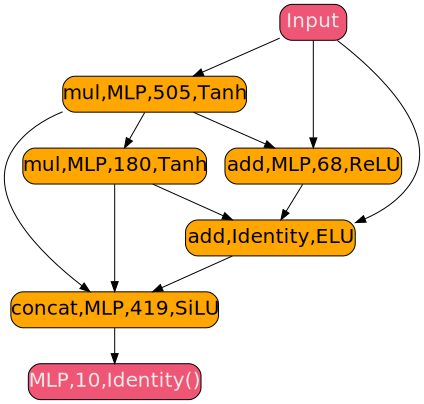

In [16]:
import graphviz
from dragon.utils.plot_functions import draw_cell, load_archi, str_operations

def draw_graph(n_dag, m_dag, output_file, act="Identity()", name="Input"):
    G = graphviz.Digraph(output_file, format='pdf',
                            node_attr={'nodesep': '0.02', 'shape': 'box', 'rankstep': '0.02', 'fontsize': '20', "fontname": "sans-serif"})

    G, g_nodes = draw_cell(G, n_dag, m_dag, "#ffa600", [], name_input=name,
                            color_input="#ef5675")
    G.node(','.join(["MLP", "10", act]), style="rounded,filled", color="black", fillcolor="#ef5675", fontcolor="#ECECEC")
    G.edge(g_nodes[-1], ','.join(["MLP", "10", act]))
    return G

best_model = load_archi("save/test_mutant/best_model/x.pkl")
labels = [e.label for e in search_space]
best_model = dict(zip(labels, best_model))
m_dag = best_model['Dag'].matrix
n_dag = str_operations(best_model["Dag"].operations)

graph = draw_graph(n_dag, m_dag, "save/_mutant/best_archi")
print(f'Model giving a score of ', np.round((1-search_algorithm.min_loss)*100, 2), '%:')
graph

# DRAGON: Symbolic Regression

#### Dragon imports

In [3]:
X = pd.DataFrame(np.random.uniform(0, 10, 100), columns=['x'])
y = pd.DataFrame()
y['y'] = 2*X['x']

In [4]:
X.head()

,x
0,6.417360
1,9.054216
2,4.597236
3,5.505073
4,3.073233


In [5]:
y.head()

,y
0,12.834721
1,18.108433
2,9.194472
3,11.010147
4,6.146466


Division into train and validation sets

#### Step skiped: adding noise to the dataset

In [6]:
class RegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_set = RegressionDataset(X, y)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

### To change: the operations_var function so activation is not set to default ones and can be only identity

MOdified operations_var function

#### size represents tree complexity and must be tackled accordingly

In [82]:
candidate_operations = operations_var(
    "Candidate operations",
    size=7,
    candidates=[identity_var("Identity"), identity_var("Identity")],
    activations=[nn.Identity()]
)

dag = dag_var("Dag", candidate_operations)
print("Example DAG:", dag.random())


Example DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- ] | MATRIX:[[0, 1, 0, 0, 1, 0], [0, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0]]


In [83]:
out = node_var(
    "Out",
    operation=identity_var("Identity"),
    activation_function=nn.Identity()
)

Search space

In [84]:
search_space = ArrayVar(dag, out, label="Search Space", neighbor=ArrayInterval())

In MetaArchi the input_shape has to be dealt wth depending on the archi of the input

In [85]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.MSELoss()

def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(1,)).to(device)
    model.eval()

    mse = 0.0
    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            mse += loss_fn(pred, yb).item()

    mse /= len(train_loader)
    print(f"Idx = {idx}, MSE = {mse:.6f}")
    return mse, model


In [86]:
loss, model = loss_function(search_space.random(), idx="test")
print("Initial MSE:", loss)


DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- ] | MATRIX:[[0, 1, 0, 0, 1, 0, 1], [0, 0, 1, 1, 0, 1, 1], [0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 1, 0, 1], [0, 0, 0, 0, 0, 1, 

In [87]:
from dragon.search_algorithm.mutant_ucb import Mutant_UCB

search_algorithm = Mutant_UCB(
    search_space,
    save_dir="save/y_equals_2x",
    T=100, # number of iterations
    N=1, # Maximum number of partial training for one configuration.
    K=50, # size of the population
    E=0.01, # Exploratory parameters
    evaluation=loss_function
)

search_algorithm.run()


2026-01-27 17:20:49,764 | WARNING | Install mpi4py if you want to use the distributed version.
2026-01-27 17:20:49,765 | INFO | save/y_equals_2x already exists. Deleting it.
2026-01-27 17:20:49,784 | INFO | The whole population has been created (size = 50), 50 have been randomy initialized.
DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) concat -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- 

Graph result

Model giving a score of  100.0 %:


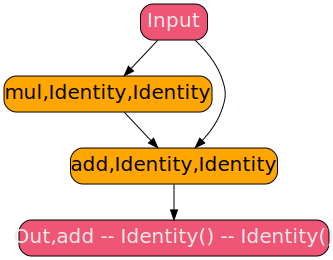

In [ ]:
import graphviz
from dragon.utils.plot_functions import draw_cell, load_archi, str_operations

def draw_graph(n_dag, m_dag, output_file, best_model, act="Identity()", name="Input"):
    G = graphviz.Digraph(
        output_file,
        format='pdf',
        node_attr={
            'nodesep': '0.02',
            'shape': 'box',
            'rankstep': '0.02',
            'fontsize': '20',
            "fontname": "sans-serif"
        }
    )

    # Draw the DAG cells
    G, g_nodes = draw_cell(G, n_dag, m_dag, "#ffa600", [], name_input=name, color_input="#ef5675")

    # Extract the combiner from the output node
    out_node = best_model["Out"]
    combiner = out_node.combiner if hasattr(out_node, "combiner") else "add"
    operation = out_node.operation.__repr__() if hasattr(out_node.operation, "__repr__") else "Identity()"

    # Create a label for the output node
    out_label = f"{combiner} -- {operation} -- {act}"
    G.node(','.join(["Out", out_label]), style="rounded,filled", color="black", fillcolor="#ef5675", fontcolor="#ECECEC")

    # Connect the last DAG node to the output node
    G.edge(g_nodes[-1], ','.join(["Out", out_label]))

    return G

# Load the best model
best_model = load_archi("save/y_equals_2x/best_model/x.pkl")
labels = [e.label for e in search_space]
best_model = dict(zip(labels, best_model))
m_dag = best_model['Dag'].matrix
n_dag = str_operations(best_model["Dag"].operations)

# Draw the graph
graph = draw_graph(n_dag, m_dag, "save/_mutant/best_archi", best_model)
print(f'Model giving a score of ', np.round((1-search_algorithm.min_loss)*100, 2), '%:')
graph


In [13]:
def dag_to_formula(operations, matrix):
    n = len(operations)                        # combiner=CatVar("Combiner", features=['add', 'mul'], neighbor=CatInterval()), # Default combiners

    formulas = {}

    # Input node
    formulas[0] = "x"

    for i in range(1, n):
        parents = [j for j in range(n) if matrix[j][i] == 1]

        if not parents:
            formulas[i] = "0"
            continue

        combiner = operations[i].combiner
        parent_exprs = [formulas[p] for p in parents]

        if combiner == "add":
            formulas[i] = "(" + " + ".join(parent_exprs) + ")"
        elif combiner == "mul":
            formulas[i] = "(" + " * ".join(parent_exprs) + ")"
        else:
            raise ValueError(f"Unknown combiner: {combiner}")

    return formulas[n - 1]


In [14]:
expr = dag_to_formula(
    best_model["Dag"].operations,
    best_model["Dag"].matrix
)

print("Discovered formula:", expr)


NameError: name 'best_model' is not defined

## -------------------------------------------------------------------------------------------------------------------------------------

## Multiple parameters (example function: z = x + y)

In [1]:
import sys
import lib.dragon
sys.modules['dragon'] = sys.modules['lib.dragon']

In [2]:
import os
import sys
import importlib
import graphviz
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import torch
import torch.nn as nn
import openml

from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

from dragon.search_space.bricks_variables import mlp_var, identity_var, operations_var, mlp_const_var, dag_var, node_var, activation_var
from dragon.search_space.base_variables import CatVar, Constant, DynamicBlock, IntVar, FloatVar, ArrayVar, Variable
from dragon.search_space.dag_encoding import AdjMatrix, Node
from dragon.search_space.dag_variables import NodeVariable, HpVar
from dragon.search_operators.base_neighborhoods import ArrayInterval, DynamicBlockInterval, CatInterval, ConstantInterval
from dragon.search_operators.dag_neighborhoods import CatHpInterval, NodeInterval
from dragon.utils.plot_functions import draw_cell, load_archi, str_operations

In [3]:
class MetaArchi(nn.Module):
    def __init__(self, args, input_shape):
        super().__init__()
        # Number of features, here equals to 16
        self.input_shape = input_shape

        # We create the DAG using the WeightsAdjCell module
        assert isinstance(args['Dag'], AdjMatrix), f"The 'Dag' argument should be an 'AdjMatrix'. Got {type(args['Dag'])} instead."
        self.dag = args['Dag']
        print(f"DAG: {self.dag}")
        self.dag.set(input_shape)


    def forward(self, X):
        return self.dag(X)
    def set_prediction_to_save(self, name, df):
        if hasattr(self, "prediction"):
            self.prediction[name] = df
        else:
            self.prediction = {name: df}
    def save(self, path):
        if not os.path.exists(path):
            os.makedirs(path)
        full_path = os.path.join(path, "best_model.pth")
        torch.save(self.state_dict(), full_path)
        if hasattr(self, "prediction"):
            for k in self.prediction.keys():
                self.prediction[k].to_csv(os.path.join(path, f"best_model_{k}_outputs.csv"))

In [4]:
X = pd.DataFrame({
    "x": np.random.uniform(0, 10, 100), 
    "y": np.random.uniform(10, 20, 100)
})

z = pd.DataFrame({
    "z": X["x"] * X["y"]
})

In [5]:
df = pd.read_csv(f"/home/echikhao/Bureau/DRAGON-SR/data/6000_points.csv")
if 'system:index' in df.columns:
    df.drop('system:index', axis=1, inplace=True)
    
if '.geo' in df.columns:
    df.drop('.geo', axis=1, inplace=True)
df['NDVI'] = (df['B8']-df['B4'])/(df['B8']+df['B4'])
df.to_csv('/home/echikhao/Bureau/DRAGON-SR/data/ndvi.csv')

In [6]:
df.head()

,B1,B11,B12,B2,B3,B4,B5,B6,B7,B8,B8A,QA60,date,lat,lon,NDVI
0,1380,3202,2266,1245,1101,1240,1413,1716,1944,1959,2250,0,2023-03-23,37.335014,-95.326731,0.224758
1,1317,49,42,889,503,288,247,208,190,141,146,0,2023-06-04,-21.011541,-124.765524,-0.342657
2,1162,2031,1475,951,850,968,1036,1136,1265,1185,1298,0,2023-01-26,11.062935,-11.792313,0.100790
3,1286,1291,444,980,823,532,832,1995,2736,2485,3134,0,2023-10-24,-1.910390,114.546423,0.647332
4,1381,2050,1363,1126,1016,975,1155,1617,1845,1806,2015,0,2023-04-13,27.868199,120.743335,0.298813


In [7]:
X = df[['B8', 'B4']]
z = df['NDVI']

In [8]:
X.head()

,B8,B4
0,1959,1240
1,141,288
2,1185,968
3,2485,532
4,1806,975


In [9]:
z.head()

0    0.224758
1   -0.342657
2    0.100790
3    0.647332
4    0.298813
Name: NDVI, dtype: float64

In [10]:
class RegressionDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.FloatTensor(X.values)
        self.y = torch.FloatTensor(y.values)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_set = RegressionDataset(X, z)
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)

#### Sum all features class

In [11]:
class SumFeatures(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        self.input_shape = input_shape

    def forward(self, X):
        # X: (batch, features)
        return X.sum(dim=-1, keepdim=True)

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return "SumFeatures()"


In [12]:
sum_features_var = HpVar(
    "SumFeatures",
    Constant("SumFeaturesOp", SumFeatures),
    hyperparameters={}   # no hyperparameters as we don't want to use them
)

#### Select a specific feature

In [13]:
class SplitFeatures(nn.Module):
    def __init__(self, input_shape, feature_index=0):
        super().__init__()
        self.input_shape = input_shape
        self.feature_index = feature_index

    def forward(self, X):
        # Split along the feature dimension
        split_tensors = torch.split(X, 1, dim=-1)
        # Select the feature at self.feature_index
        return split_tensors[self.feature_index]

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return f"SplitFeatures(feature_index={self.feature_index})"


In [14]:
n_features = 2
split_features_var = HpVar(
    "SplitFeatures",
    Constant("SplitFeaturesOp", SplitFeatures),
    hyperparameters={
        "feature_index": IntVar("feature_index", 0, n_features-1),
    }
)


#### Negate

In [15]:
class Negate(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        self.input_shape = input_shape

    def forward(self, X):
        return -X

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return "Negate()"


In [16]:
negate_var = HpVar(
    "Negate",
    Constant("NegateOp", Negate),
    hyperparameters={}
)

## Select Features

In [17]:
class SelectFeatures(nn.Module):
    def __init__(self, input_shape, feature_indices=None):
        super().__init__()
        self.input_shape = input_shape
        self.feature_indices = feature_indices

    def forward(self, X, h=None):
        if self.feature_indices is None:
            return X

        n_features = X.shape[-1]
        idx = torch.as_tensor(self.feature_indices, device=X.device)

        if idx.max() >= n_features:
            raise ValueError(
                f"SelectFeatures: index {idx.max().item()} "
                f"out of bounds for input with {n_features} features"
            )

        return X[..., idx]


    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return f"SelectFeatures(feature_indices={self.feature_indices})"


In [18]:
select_features_var = HpVar(
    "SelectFeatures",
    Constant("SelectFeaturesOp", SelectFeatures),
    hyperparameters={
        "feature_indices": CatVar(
            "feature_indices",
            features=[
                None,
                [0],
                [1],
                [0, 1],
                [1, 0]
            ],
            neighbor=CatInterval()
        )
    }
)


## Inverse

In [19]:
class Inverse(nn.Module):
    def __init__(self, input_shape):
        super().__init__()
        self.input_shape = input_shape

    def forward(self, X):
        return 1 / (X + 1e-8)

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return "Inverse()"


In [20]:
inverse_var = HpVar(
    "Inverse",
    Constant("InverseOp", Inverse),
    hyperparameters={}
)

## Switch Features

In [21]:
class SwitchFeatures(nn.Module):
    def __init__(self, input_shape, index1=0, index2=1):
        super().__init__()
        self.input_shape = input_shape
        self.index1 = index1
        self.index2 = index2

    def forward(self, X):
        # X shape: (batch, features)
        assert X.shape[-1] > max(self.index1, self.index2), \
            f"Invalid indices {self.index1}, {self.index2} for input shape {X.shape}"

        X = X.clone()

        tmp = X[..., self.index1].clone()
        X[..., self.index1] = X[..., self.index2]
        X[..., self.index2] = tmp

        return X

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return f"SwitchFeatures(index1={self.index1}, index2={self.index2})"


In [22]:
n_features = 2

switch_features_var = HpVar(
    "SwitchFeatures",
    Constant("SwitchFeaturesOp", SwitchFeatures),
    hyperparameters={
        "index1": IntVar("index1", 0, n_features - 1),
        "index2": IntVar("index2", 0, n_features - 1),
    }
)

## Divide

In [23]:
import torch
import torch.nn as nn

class Divide(nn.Module):
    def __init__(self, input_shape=None, eps=1e-6):
        super().__init__()
        self.input_shape = input_shape

    def forward(self, X):
        """
        X shape: (..., 2)
        X[..., 0] = numerator
        X[..., 1] = denominator
        """
        assert X.shape[-1] == 2, f"Divide expects 2 features, got {X.shape[-1]}"
        num = X[..., 0]
        den = X[..., 1]
        return num / (den + 1e-8)

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return f"Divide"


In [24]:
divide_var = HpVar(
    "Divide",
    Constant("DivideOp", Divide),
    hyperparameters={}
)


## Substract

In [25]:
class Substract(nn.Module):
    def __init__(self, input_shape, eps=1e-8):
        super().__init__()
        self.input_shape = input_shape
        self.eps = eps

    def forward(self, X):
        """
        X shape: (batch, 2)
        returns: (batch, 1)
        """
        assert X.shape[-1] == 2, "Subtract expects exactly 2 inputs"
        return X[..., 0:1] - X[..., 1:2]

    def modify_operation(self, input_shape):
        self.input_shape = input_shape

    def __repr__(self):
        return "Substract()"

In [26]:
substract_var = HpVar(
    "Substract",
    Constant("SubtractOp", Substract),
    hyperparameters={}
)


In [27]:
from dragon.search_operators.dag_neighborhoods import HpInterval
from dragon.search_space.bricks_variables import (
    identity_var,
    operations_var,
    dag_var,
    node_var
)
from dragon.search_space.bricks.basics import Identity

unary_var = HpVar(
    "UnaryOp",
    CatVar(
        "UnaryOpType",
        features=[Identity, Inverse, Negate],
        neighbor=CatInterval()
    ),
    hyperparameters={},
    neighbor=HpInterval()
)
select_features_var = HpVar(
    "SelectFeatures",
    Constant("SelectFeaturesOp", SelectFeatures, neighbor=ConstantInterval()),
    hyperparameters={
        "feature_indices": CatVar(
            "feature_indices",
            features=[[0], [1]],
            neighbor=CatInterval()
        )
    },
    neighbor=HpInterval()
)

sum_var = HpVar(
    "Sum",
    Constant("SumOp", SumFeatures, neighbor=ConstantInterval()),
    hyperparameters={},
    neighbor=HpInterval()
)


candidate_operations = operations_var(
    "CandidateOperations",
    size=10,
    candidates=[
        select_features_var,
        identity_var("Identity"),
        # unary_var,
        # sum_var
    ],
    combiner_features = ['add', 'mul', 'sub', 'divide'],
    activations=[Constant(
        "id",
        value=nn.Identity(),
        neighbor=ConstantInterval()
    )]
)


dag = dag_var("Dag", candidate_operations, complexity=8)
print("Example DAG:", dag.random())


Example DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) divide -- (name) <class '__main__.SelectFeatures'> -- (hp) {'feature_indices': [0]} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class '__main__.SelectFeatures'> -- (hp) {'feature_indices': [1]} -- (activation) Identity() -- , 
(combiner) divide -- (name) <class '__main__.SelectFeatures'> -- (hp) {'feature_indices': [0]} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- ] | MATRIX:[[0, 1, 0, 1, 0, 1], [0, 0, 1, 1, 0, 0], [0, 0, 0, 1, 1, 1], [0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0]]


In [28]:
from dragon.search_space.base_variables import ArrayVar
from dragon.search_operators.base_neighborhoods import ArrayInterval

search_space = ArrayVar(dag, label="Search Space", neighbor=ArrayInterval())


## Cusom loss

In [29]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.MSELoss()

def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    mse = 0.0
    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            mse += loss_fn(pred, yb).item()

    mse /= len(train_loader)
    print(f"Idx = {idx}, MSE = {mse:.6f}, mean: {pred.mean().item():.6f}")

    df = pd.DataFrame({
        "pred": pred.squeeze().cpu().numpy(),
        "true": yb.squeeze().cpu().numpy()
    })
    model.set_prediction_to_save("test", df)
    return mse, model

## Loss 1: MSE

In [30]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    loss_fn = torch.nn.MSELoss(reduction="mean")

    total_se = 0.0
    total_n = 0

    all_pred = []
    all_true = []

    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            

            #MSE
            se = loss_fn(pred, yb)
            total_se += se.item()
            total_n += yb.numel()

            #Log
            all_pred.append(pred.detach().cpu())
            all_true.append(yb.detach().cpu())

    mse = total_se / total_n
    print(f"Idx = {idx}, MSE = {mse:.6f}, mean pred: {pred.mean().item():.6f}")

    # df over all samples
    pred_all = torch.cat(all_pred).squeeze().numpy()
    true_all = torch.cat(all_true).squeeze().numpy()

    

    df = pd.DataFrame({
        "pred": pred_all,
        "true": true_all
    })

    model.set_prediction_to_save("test", df)
    return mse, model


## Loss 2

In [31]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def loss_function(args, idx, eps=1e-1, mse_threshold=0.04, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    loss_fn = torch.nn.MSELoss(reduction="mean")

    total_se = 0.0
    total_n = 0

    all_pred = []
    all_true = []

    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)

            #MSE
            se = loss_fn(pred, yb)
            total_se += se.item()
            total_n += yb.numel()

            #Log
            all_pred.append(pred.detach().cpu())
            all_true.append(yb.detach().cpu())

    mse = total_se / total_n

 
    pred_all = torch.cat(all_pred).squeeze().numpy()
    true_all = torch.cat(all_true).squeeze().numpy()

    #Close match
    close_matches = np.sum(np.abs(pred_all - true_all) < eps)
    fraction_close = close_matches / len(pred_all)
    print(f"Idx = {idx}, MSE = {mse:.6f}, mean pred: {pred_all.mean():.6f}, "
          f"Number of close matches: {close_matches} out of {len(pred_all)}, "
          f"fraction close = {fraction_close:.4f}")


    df = pd.DataFrame({
        "pred": pred_all,
        "true": true_all
    })
    model.set_prediction_to_save("test", df)

    if mse > mse_threshold:
        loss = mse
    else:
        loss = (1 - fraction_close)/200

    return loss, model

## Loss 3: correlation coefficient

In [32]:
def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    all_pred = []
    all_true = []

    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            all_pred.append(pred.detach().cpu())
            all_true.append(yb.detach().cpu())

    pred_all = torch.cat(all_pred).squeeze()
    true_all = torch.cat(all_true).squeeze()

    # Correlation
    pred_mean = pred_all.mean()
    true_mean = true_all.mean()
    
    covariance = ((pred_all - pred_mean) * (true_all - true_mean)).mean()
    pred_std = pred_all.std()
    true_std = true_all.std()
    
    correlation = covariance / (pred_std * true_std + 1e-8)
    
    # Loss = 1 - correlation
    loss = 1.0 - correlation.item()
    
    print(f"Idx = {idx}, Correlation = {correlation.item():.6f}, Loss = {loss:.6f}")

    df = pd.DataFrame({
        "pred": pred_all.numpy(),
        "true": true_all.numpy()
    })
    model.set_prediction_to_save("test", df)

    return loss, model

## Loss 4: r²

In [33]:
def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    all_pred = []
    all_true = []

    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            all_pred.append(pred.detach().cpu())
            all_true.append(yb.detach().cpu())

    pred_all = torch.cat(all_pred).squeeze()
    true_all = torch.cat(all_true).squeeze()

    # R² = 1 - (SS_res / SS_tot)
    ss_res = ((true_all - pred_all) ** 2).sum()
    ss_tot = ((true_all - true_all.mean()) ** 2).sum()
    
    r2 = 1 - (ss_res / (ss_tot + 1e-8))
    
    # Loss = 1 - R²
    loss = 1.0 - r2.item()
    
    print(f"Idx = {idx}, R² = {r2.item():.6f}, Loss = {loss:.6f}")

    df = pd.DataFrame({
        "pred": pred_all.numpy(),
        "true": true_all.numpy()
    })
    model.set_prediction_to_save("test", df)

    return loss, model

## Loss 5: MSE all batches

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
loss_fn = nn.MSELoss()

def loss_function(args, idx, *kwargs):
    labels = [e.label for e in search_space]
    args = dict(zip(labels, args))

    model = MetaArchi(args, input_shape=(2,)).to(device)
    model.eval()

    all_pred = []
    all_true = []

    with torch.no_grad():
        for Xb, yb in train_loader:
            Xb, yb = Xb.to(device), yb.to(device)
            pred = model(Xb)
            all_pred.append(pred.detach().cpu())
            all_true.append(yb.detach().cpu())

    pred_all = torch.cat(all_pred).squeeze()
    true_all = torch.cat(all_true).squeeze()

    mse = loss_fn(pred_all, true_all)
    
  
    
    loss = mse.item()
    
    print(f"Idx = {idx}, MSE = {mse.item():.6f} ")

    df = pd.DataFrame({
        "pred": pred_all.numpy(),
        "true": true_all.numpy()
    })
    model.set_prediction_to_save("test", df)

    return loss, model

In [35]:
loss, model = loss_function(minimal_graph, idx="test")
print("Initial MSE:", loss)


NameError: name 'minimal_graph' is not defined

## Minimal correct configuration

### Config 1

In [36]:
from dragon.search_space.bricks.basics import Identity


m_dag = [Node(combiner='add', operation=Identity, hp = {}, activation=nn.Identity()), 
         Node(combiner='concat', operation=SumFeatures, hp = {}, activation=nn.Identity()), 
         Node(combiner='mul', operation=Negate, hp={}, activation=nn.Identity()), 
         Node(combiner='concat', operation=SelectFeatures, hp={'feature_indices': [0]}, activation=nn.Identity()), 
         Node(combiner='concat', operation=SelectFeatures, hp={'feature_indices': [1]}, activation=nn.Identity()), 
         Node(combiner='add', operation=Inverse, hp={}, activation=nn.Identity()), 
         Node(combiner='mul', operation=Identity, hp={}, activation=nn.Identity()),
         Node(combiner='add', operation=Inverse, hp={}, activation=nn.Identity())]
n_dag = np.array([[0, 1, 1, 1, 0, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 1, 0, 0],
                  [0, 0, 0, 0, 0, 0, 1, 0],
                  [0, 0, 0, 0, 0, 0, 0, 1],
                  [0, 0, 0, 0, 0, 0, 0, 0]
                  ])

minimal_graph = [AdjMatrix(matrix=n_dag, operations=m_dag)]

### COnfig 2

In [37]:
from dragon.search_space.bricks.basics import Identity

m_dag = [
    Node(combiner='mul', operation=Identity, 
         hp={}, activation=nn.Identity()),

    Node(combiner='add', operation=SelectFeatures, 
         hp={'feature_indices': [0]}, activation=nn.Identity()),
    
    Node(combiner='add', operation=SelectFeatures, 
         hp={'feature_indices': [1]}, activation=nn.Identity()),
    
    Node(combiner='sub', operation=Identity, 
         hp={}, activation=nn.Identity()),
    
    Node(combiner='add', operation=Identity, 
         hp={}, activation=nn.Identity()),
    
    Node(combiner='divide', operation=Identity, 
         hp={}, activation=nn.Identity()),
]



n_dag = np.array([
    [0, 1, 1, 0, 0, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0],
])

minimal_graph = [AdjMatrix(matrix=n_dag, operations=m_dag)]

In [38]:
adj = AdjMatrix(operations=m_dag, matrix=n_dag)
adj.set((2,))

Input = torch.tensor([[1,2],[3,4],[5,6]], dtype=torch.float32)
out = adj(Input)
print("Output shape:", out.shape)
print(out)

Output shape: torch.Size([3, 1])
tensor([[-0.3333],
        [-0.1429],
        [-0.0909]])


In [52]:
from dragon.search_algorithm.mutant_ucb import Mutant_UCB

search_algorithm = Mutant_UCB(
    search_space,
    save_dir="save/NDVI",
    T=200,
    N=1,
    K=20,
    E=0.15,
    evaluation=loss_function,
    # models=[minimal_graph],
    # verbose= True
)

search_algorithm.run()

2026-02-02 09:50:00,582 | WARNING | Install mpi4py if you want to use the distributed version.
2026-02-02 09:50:00,583 | INFO | save/NDVI already exists. Deleting it.
2026-02-02 09:50:00,591 | INFO | The whole population has been created (size = 20), 20 have been randomy initialized.
DAG: NODES: [
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) sub -- (name) <class '__main__.SelectFeatures'> -- (hp) {'feature_indices': [1]} -- (activation) Identity() -- , 
(combiner) add -- (name) <class '__main__.SelectFeatures'> -- (hp) {'feature_indices': [1]} -- (activation) Identity() -- , 
(combiner) sub -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) mul -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp) {} -- (activation) Identity() -- , 
(combiner) add -- (name) <class 'dragon.search_space.bricks.basics.Identity'> -- (hp)

Model giving a score of  90.96 %:


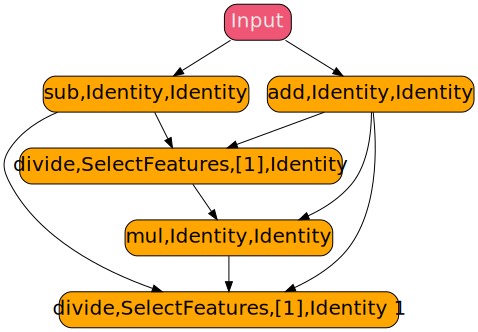

In [43]:
import graphviz
from dragon.utils.plot_functions import draw_cell, load_archi, str_operations

def draw_graph(n_dag, m_dag, output_file, best_model, act="Identity()", name="Input"):
    G = graphviz.Digraph(
        output_file,
        format='pdf',
        node_attr={
            'nodesep': '0.02',
            'shape': 'box',
            'rankstep': '0.02',
            'fontsize': '20',
            "fontname": "sans-serif"
        }
    )

    # Draw the DAG cells
    G, g_nodes = draw_cell(G, n_dag, m_dag, "#ffa600", [], name_input=name, color_input="#ef5675")

    return G

# Load the best model
best_model = load_archi("save/NDVI/best_model/x.pkl")
labels = [e.label for e in search_space]
best_model = dict(zip(labels, best_model))
m_dag = best_model['Dag'].matrix
n_dag = str_operations(best_model["Dag"].operations)

# Draw the graph
graph = draw_graph(n_dag, m_dag, "save/_mutant/best_archi", best_model)
print(f'Model giving a score of ', np.round((1-search_algorithm.min_loss)*100, 2), '%:')
graph


In [45]:
import graphviz
import numpy as np

def draw_graph(n_dag, m_dag, output_file):
    G = graphviz.Digraph(
        output_file,
        format='pdf',
        node_attr={
            'nodesep': '0.02',
            'shape': 'box',
            'ranksep': '0.5',
            'fontsize': '10',
            'fontname': 'sans-serif'
        }
    )

    for i, node_info in enumerate(m_dag):

        if hasattr(node_info, "operation"):
            op = node_info.operation
            label = f"{i}: {repr(op)}"

        elif isinstance(node_info, (list, tuple)):
            label = f"{i}: " + " | ".join(map(str, node_info))

        else:
            label = f"{i}: {str(node_info)}"

        G.node(
            str(i),
            label=label,
            shape='box',
            style='filled',
            color='black',
            fillcolor='#ffa600'
        )

    for i in range(n_dag.shape[0]):
        for j in range(n_dag.shape[1]):
            if n_dag[i, j] == 1:
                G.edge(str(i), str(j))

    return G



graph = draw_graph(n_dag, m_dag, "best_archi")
graph

AttributeError: 'list' object has no attribute 'shape'

## Graph to formula function

In [54]:
def op_tensors(input, combiner):
    if combiner == "add":
        op = '+'
    if combiner == "mul":
        op = '*'
    if combiner == "sub":
        op = '-'
    if combiner == "divide":
        op = '/'
    
    n = max(len(l) for l in input)
    for l in input:
        if len(l) < n:
            l += ['0'] * (n - len(l))
            l.reverse()
    result = []
    for l in input:
        for j in range(len(l)):
            if len(result) < j + 1:
                result.append(l[j])
            else:
                result[j] = f"({result[j]}) {op} ({l[j]})"
    return result

In [55]:
from sympy import simplify

def graph_to_formula(adj_matrix, X, nodes):
    n = adj_matrix.shape[0]

    # Input node
    shape = X.shape[-1]
    input = ["x" + str(i) for i in range(shape)]

    out_dict = {}
    out_dict[0] = input

    for i in range(1, n):
        parents = [j for j in range(n) if adj_matrix[j, i] == 1]
        input = [out_dict[j] for j in parents]


        #Combiners
        combiner = nodes[i].combiner
        operation = nodes[i].operation

        out = op_tensors(input, combiner)                        
                        
        #Operations
        if isinstance(operation, SelectFeatures) or operation.__class__.__name__ == 'SelectFeatures':

            feature_indices = nodes[i].hp.get('feature_indices', None)
            out = [out[i] for i in feature_indices] if feature_indices is not None else out


        out_dict[i] = out


    
    expr = out_dict[n - 1][0]
    simplified_expression = simplify(expr)
    return simplified_expression

expr = graph_to_formula(best_model['Dag'].matrix, X, best_model['Dag'].operations)

In [56]:
expr

4/(4*x1 + 1)